In [6]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

g = ct.Solution("seiser.cti") # Import reaction data

# g.TP = 1200, 101325
# g.Y = np.array([0.5, 0, 0.5, 0, 0])
# g.Y = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
g.Y = np.ones(g.n_species) / g.n_species
g.TP = 1200, 101325
g()



**** WARNING ****
For species c7h15o-1, discontinuity in h/RT detected at Tmid = 1391
	Value computed using low-temperature polynomial:  21.8343
	Value computed using high-temperature polynomial: 21.767

  gas:

       temperature            1200  K
          pressure          101325  Pa
           density        0.377851  kg/m^3
  mean mol. weight         37.2066  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.1341e+06        1.538e+08     J
   internal energy      3.8659e+06        1.438e+08     J
           entropy           10684        3.975e+05     J/K
    Gibbs function     -8.6872e+06       -3.232e+08     J
 heat capacity c_p          3280.6        1.221e+05     J/K
 heat capacity c_v          3057.2        1.137e+05     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                n2     0.00

In [7]:
#g.TP = 1200, 101325
#g.set_equivalence_ratio(phi=1.0, fuel='nc7h16', oxidizer={'o2':1.0, 'n2':3.76})
r = ct.IdealGasReactor(g)
sim = ct.ReactorNet([r])
n_t = 200
Pt = np.zeros(n_t)
Tt = np.zeros(n_t)
Yt = np.zeros((g.n_species,n_t))
for i in range(n_t):
    sim.advance((i+1)*1e-14)
    # sim.advance(5.93e-6)
    Pt[i] = g.P
    Tt[i] = g.T
    Yt[:,i] = g.Y
g()


  gas:

       temperature         1203.92  K
          pressure          102632  Pa
           density        0.377851  kg/m^3
  mean mol. weight         36.8526  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.1376e+06        1.525e+08     J
   internal energy      3.8659e+06        1.425e+08     J
           entropy           10723        3.952e+05     J/K
    Gibbs function     -8.7715e+06       -3.233e+08     J
 heat capacity c_p          3279.9        1.209e+05     J/K
 heat capacity c_v          3054.3        1.126e+05     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                n2     0.00822206          0.00625         -30.1405
               ch3      0.0165027       0.00673265         -16.4287
                 h       0.230328        0.0062996          4.92866
               ch4      0.01

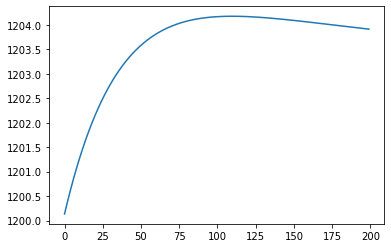

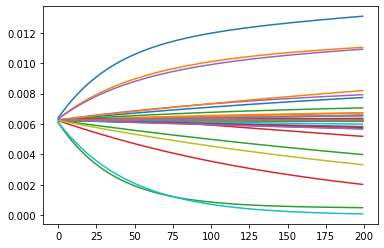

In [8]:
plt.plot(Tt)
plt.figure()
for i in range(g.n_species):
    plt.plot(Yt[i,:])